When picking between Lasso, KNN, and correlation for choosing which variables to use, it depends on our data, the problem we're solving, and the characteristics of the variables we have.

If we want to automatically pick the important variables, especially for linear models, we go for Lasso. It's good at finding a balance between making the model not too complicated and using the right variables.


If we're intrested in looking at Pairs of variables, we go for Correlation.

If the relationships between nearby datapoints really matter, we go for KNN.

We have a data where,

1.No pairing is considered: Therefore, we eliminate Correlation

2. Relationship between nearby datapoints doesn't really matter, we eliminate KNN

3. Lasso is the best option because, we need to pick the important variables of too many variables ( which is present in our dataset)


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#reading csv file
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,17,0,34.33,35.95,2187,7,7,0
1,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,1,0,7.47,7.82,476,1,2,0
2,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,2,0,6.14,6.43,391,1,1,0
3,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,11,0,2.39,2.50,152,0,0,0
4,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,10,0,2.04,2.14,130,0,0,0


Best alpha: 0.001
Selected Features:
Index(['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'pre.nullVotes', 'pre.nullVotesPercentage', 'Party',
       'Percentage', 'Votes', 'Hondt', 'Date'],
      dtype='object')


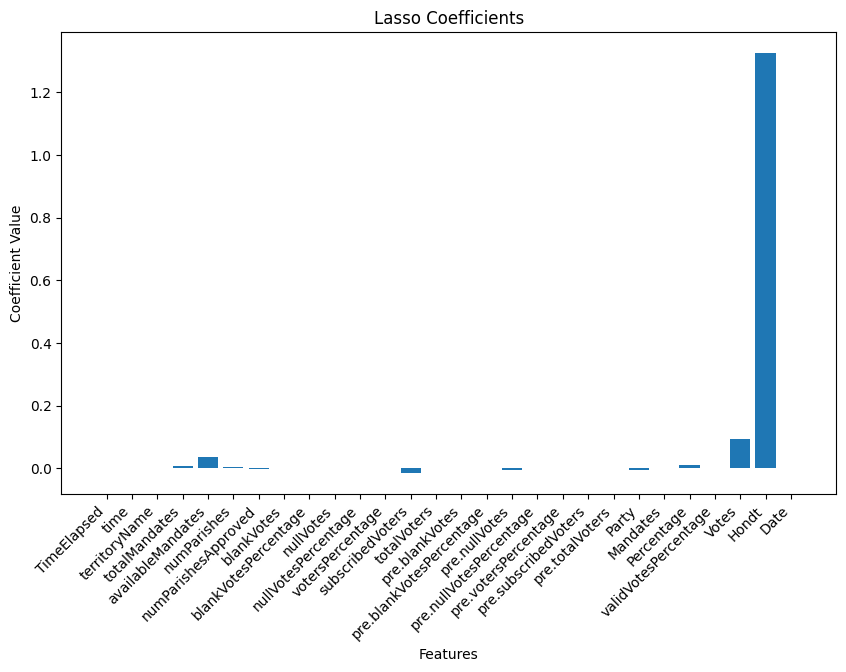

Mean Squared Error (Lasso): 0.03155265538660462


In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset loaded into a DataFrame called 'data'
# Replace 'your_target_variable' with the actual name of your target variable
target_variable = 'FinalMandates'

# Selecting features and target variable
x = data.drop(columns=[target_variable])
y = data[target_variable]

# Identify columns with null values
columns_with_null = x.columns[x.isnull().any()]

# Drop columns with null values
x = x.drop(columns=columns_with_null)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Hyperparameter Tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Adjust the alpha values based on your preference
lasso_model = Lasso()
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_scaled, y_train)

# Extracting the best model with optimal hyperparameters
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Print the best hyperparameters
print(f'Best alpha: {best_alpha}')

# Extracting selected features
selected_features = x.columns[best_lasso_model.coef_ != 0]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Visualizing the coefficients
plt.figure(figsize=(10, 6))
plt.bar(x.columns, best_lasso_model.coef_)
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

# Predicting using the best Lasso model
y_pred_lasso = best_lasso_model.predict(x_test_scaled)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)


The Selected Variables are

1.totalMandates

2.availableMandates

3.numParishes

4.numParishesApproved

5.blankVotesPercentage

6.votersPercentage

7.subscribedVoters

8.pre.nullVotes

9.pre.nullVotesPercentage

10.Party

11.Percentage

12.Votes

13.Hondt

14.Date